In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
import scipy.fft

In [2]:
import os

In [3]:
data_files = {
    data_dir: [
        os.path.join('../data', data_dir, f) for f in os.listdir(os.path.join('../data', data_dir)) if f.endswith('.wav')
    ]
    for data_dir in os.listdir('../data')
}

In [4]:
data = {
    data_dir: list(map(scipy.io.wavfile.read, files))
    for data_dir, files in data_files.items()
}

In [5]:
for data_dir, data_vals in data.items():
    print(data_dir, 'lengths:', *map("{:.2f}".format, (v.shape[0] / rate for rate, v in data_vals)), sep='\t')

blue	lengths:	3.50	2.47	2.60	2.35	2.05
green	lengths:	2.56	2.75	2.84	2.60	2.52
nie	lengths:	2.47	2.71	2.67	2.56	2.52
one	lengths:	2.94	3.37	3.41	3.01	3.41
red	lengths:	2.56	2.56	2.65	1.77	1.73
tak	lengths:	2.43	2.33	2.67	2.45	2.28
two	lengths:	2.52	2.56	2.62	2.56	2.60
_	lengths:	2.62	2.71	2.52	2.56	2.75


In [63]:
def find_window(values, width):
    fw = np.cumsum(np.abs(values))
    
    start = np.argmax([fw[width + i] - fw[i] for i in range(len(values) - width)])
    end = start + width
    
    return start, end, np.mean(np.abs(values[:s])), np.mean(np.abs(values[e:]))

blue


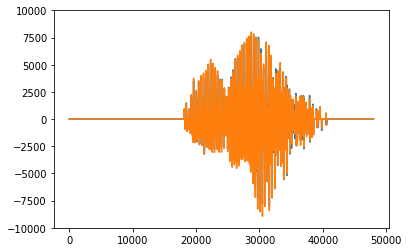

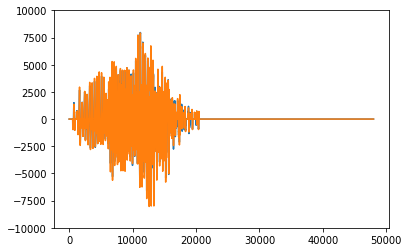

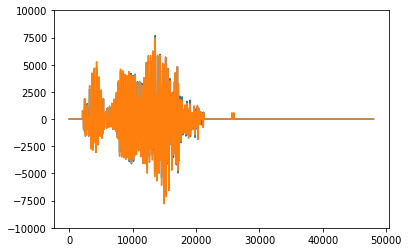

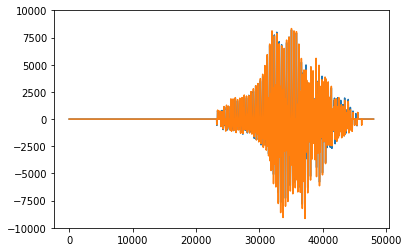

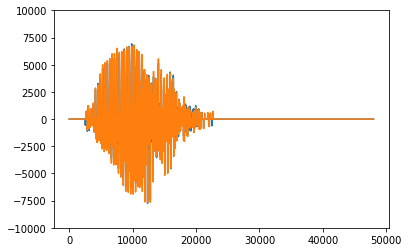

green


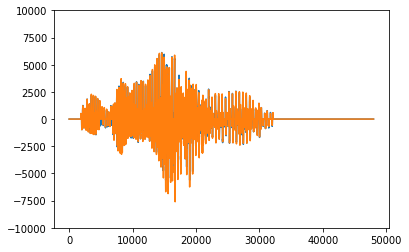

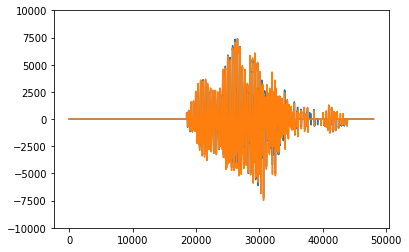

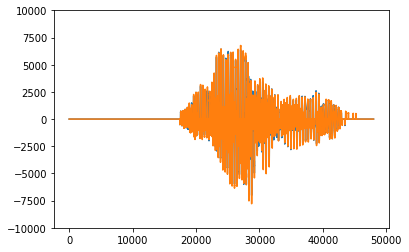

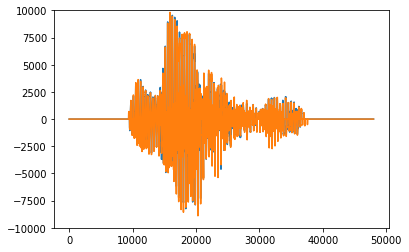

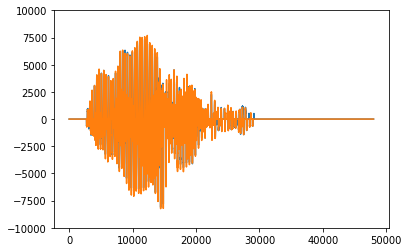

nie


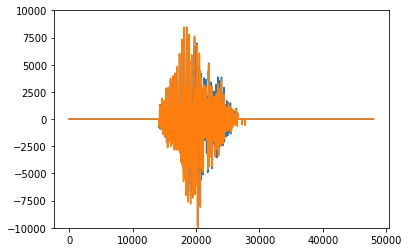

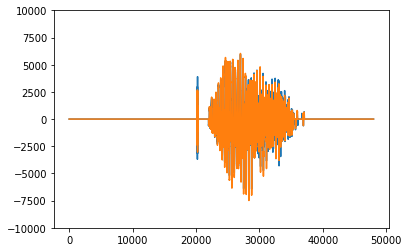

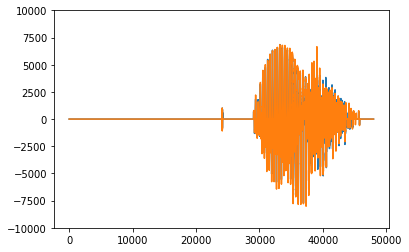

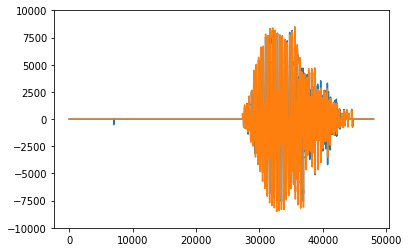

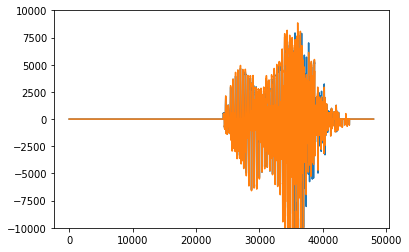

one


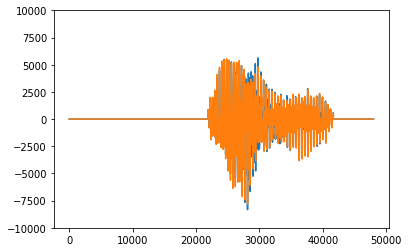

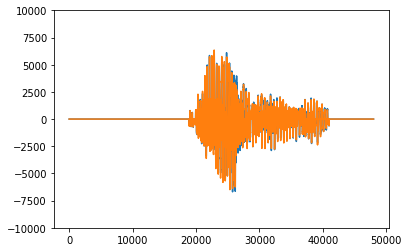

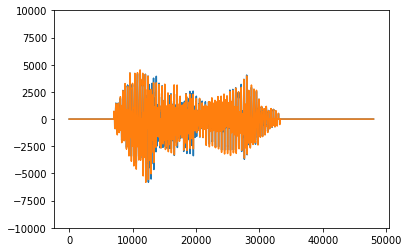

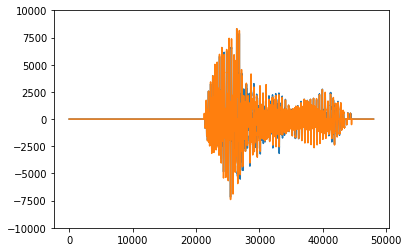

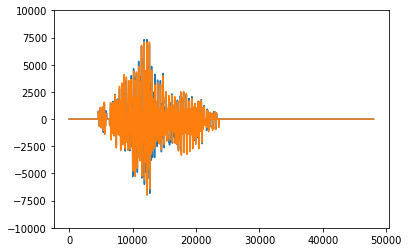

red


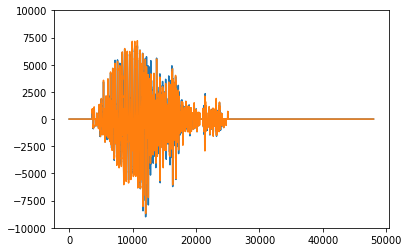

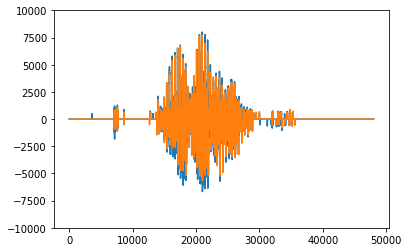

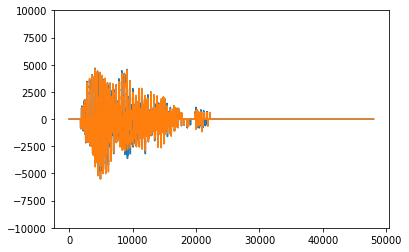

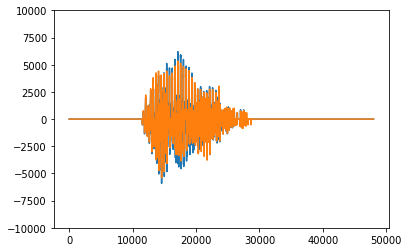

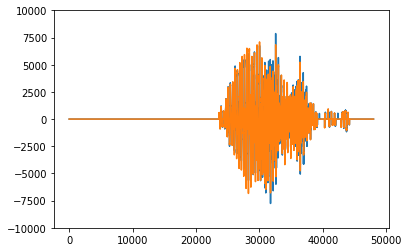

tak


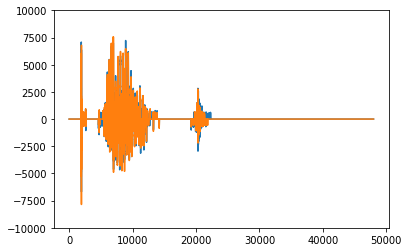

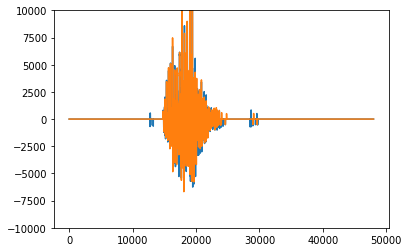

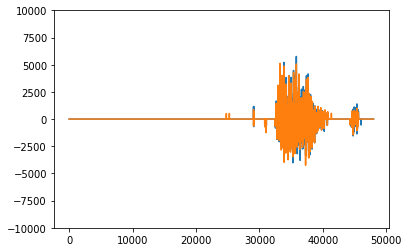

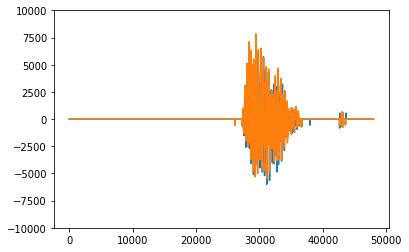

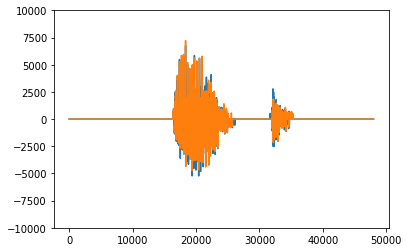

two


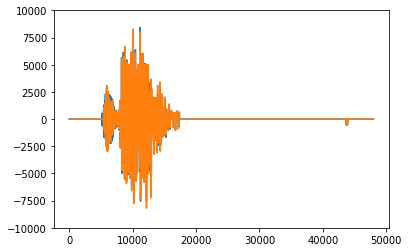

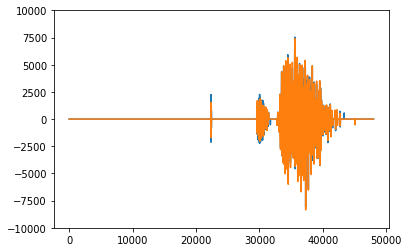

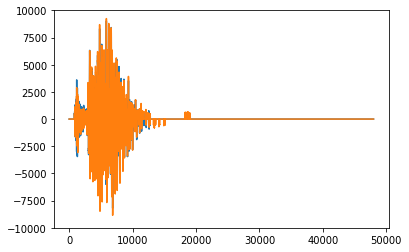

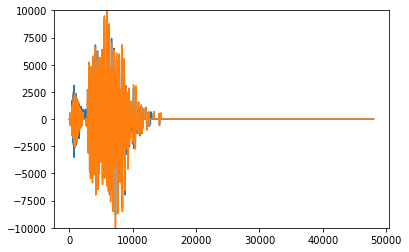

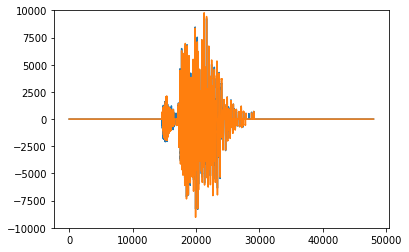

_


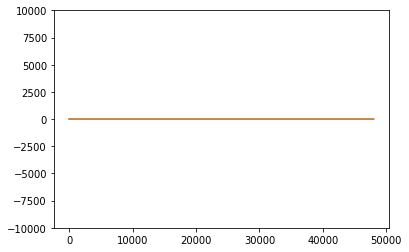

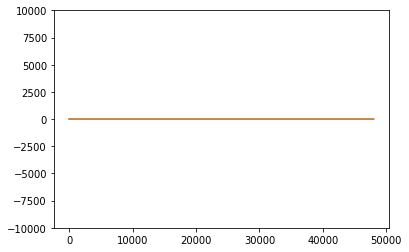

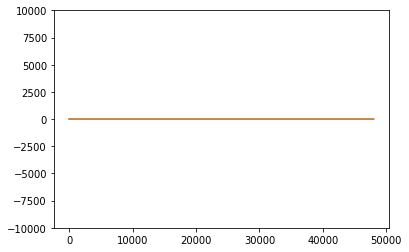

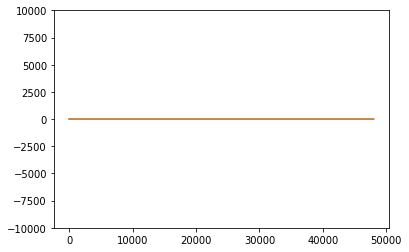

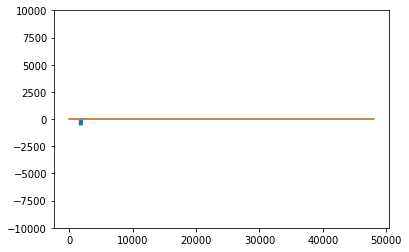

In [104]:
threshold = 500

data_processed = {}

for data_dir, data_vs in data.items():
    print(data_dir)
    data_processed[data_dir] = []
    for data_v in data_vs:
        s, e, _, _ = find_window(data_v[1].mean(-1), data_v[0])
        processed = data_v[1][s:e]
        processed = processed * ((processed < -threshold) | (processed > threshold))
        plt.plot(processed)
        plt.ylim(-10000, 10000)
        plt.show()
        data_processed[data_dir].append((data_v[0], processed[:,0]))
        data_processed[data_dir].append((data_v[0], processed[:,1]))

        
        

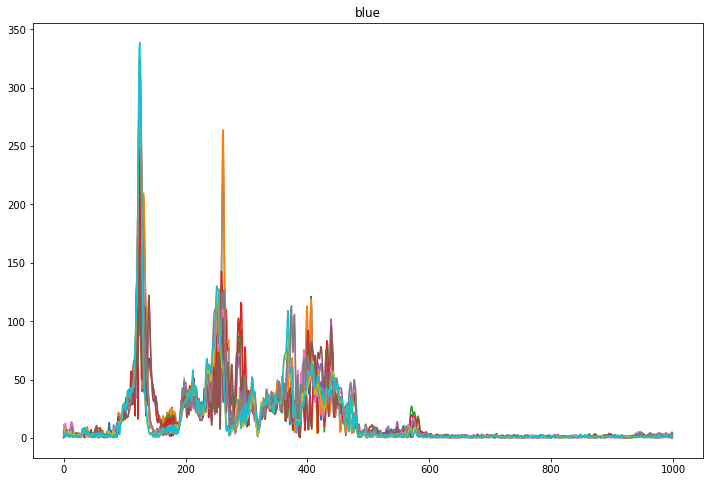

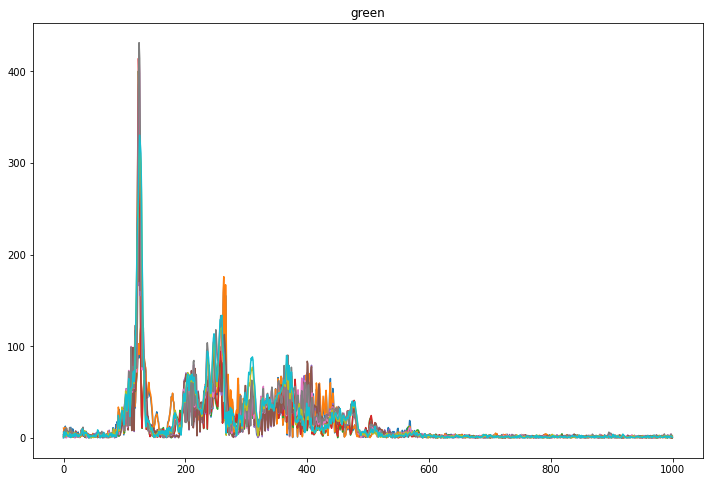

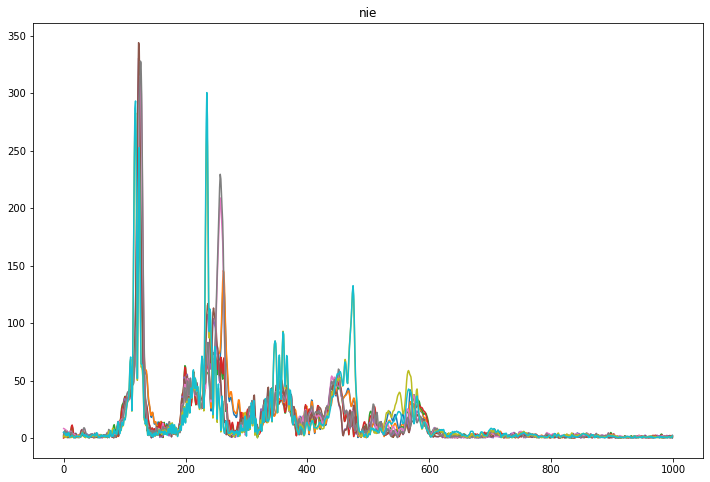

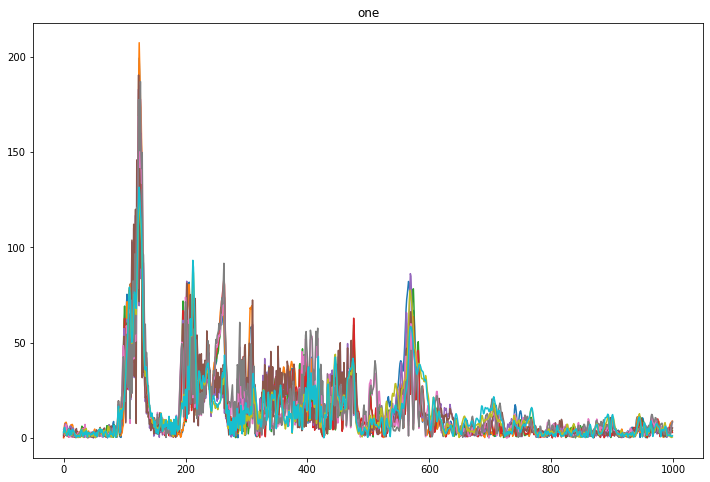

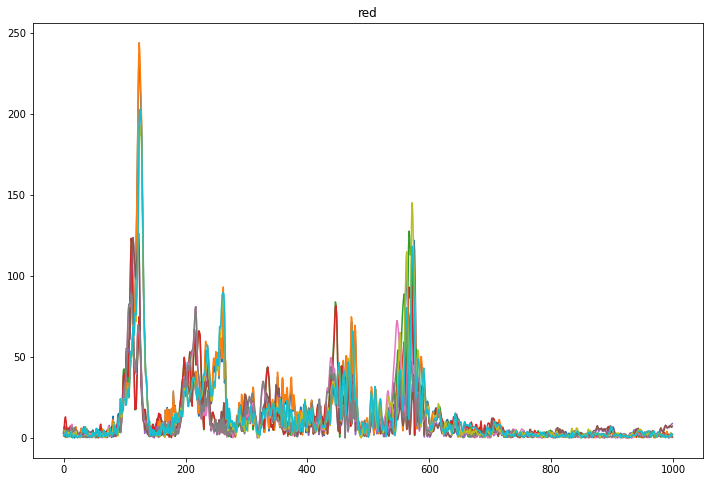

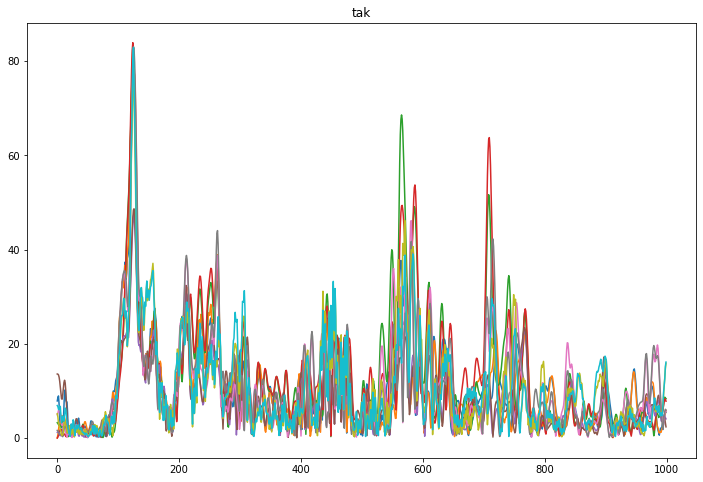

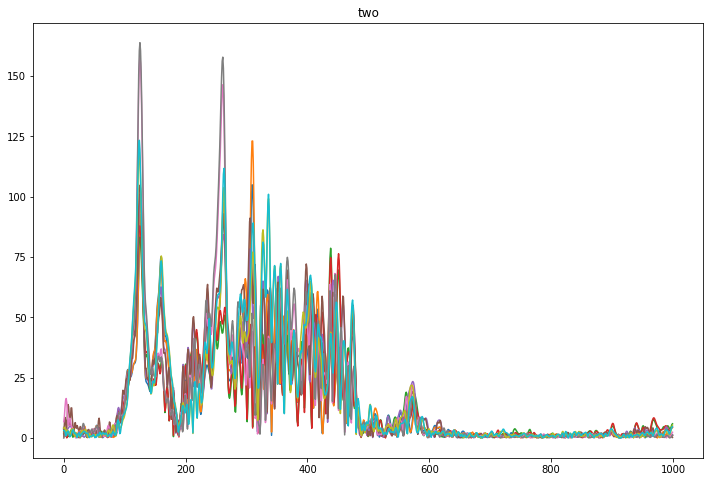

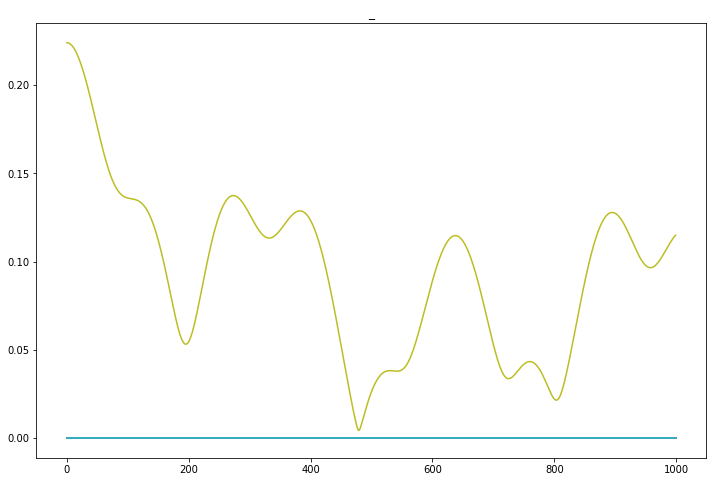

In [106]:
for category, cat_data in data_processed.items():
    plt.figure(figsize=(12, 8))
    plt.title(category)
    for rate, wav in cat_data:
        y = np.abs(scipy.fft.fft(wav))
        x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
        plt.plot(x[:x.shape[0] // 2][:1000], y[:x.shape[0] // 2][:1000] / x.shape[0])
    plt.show()

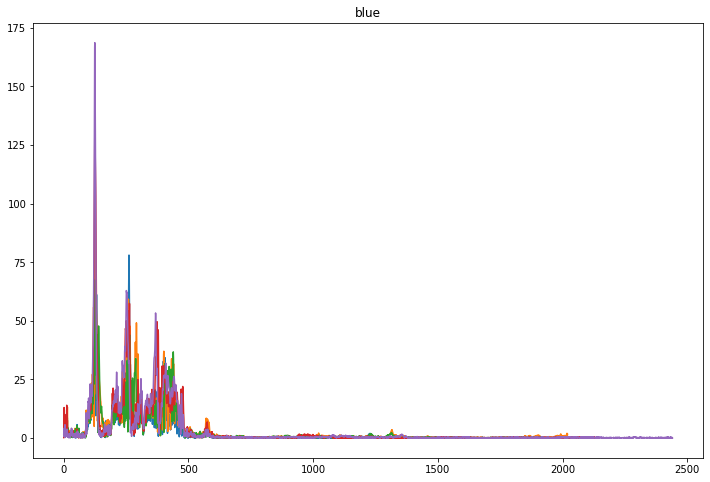

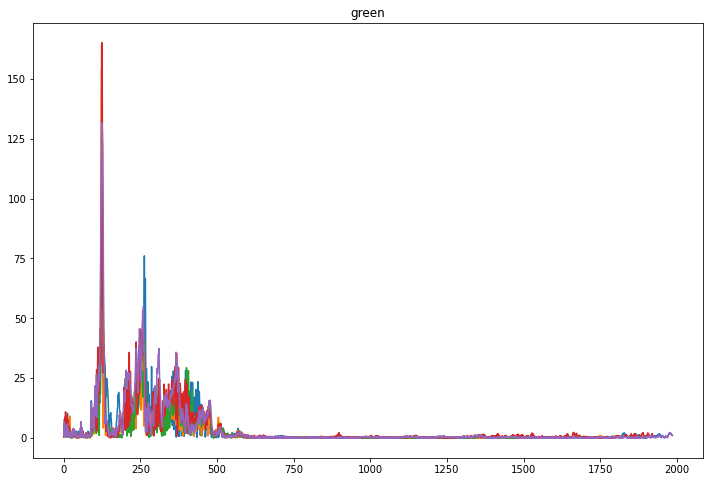

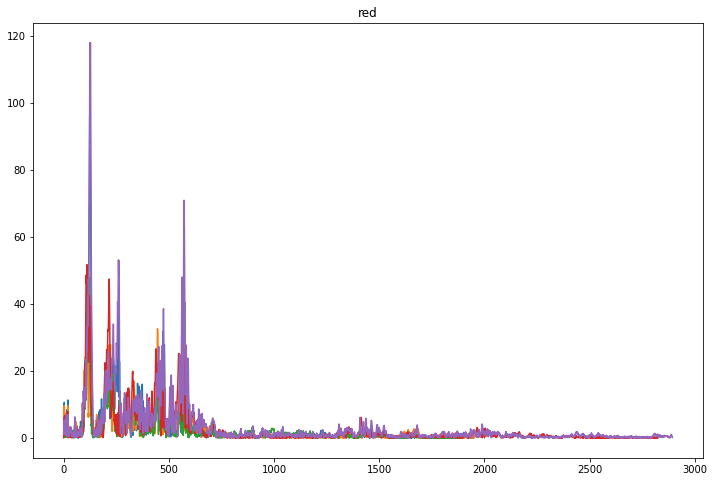

In [107]:
for category, cat_data in data.items():
    if category not in ('red', 'green', 'blue'):
        continue
    plt.figure(figsize=(12, 8))
    plt.title(category)
    for rate, wav in cat_data:
        y = np.abs(scipy.fft.fft(wav[:,1]))
        x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
        plt.plot(x[:x.shape[0] // 2][:5000], y[:x.shape[0] // 2][:5000] / x.shape[0])
    plt.show()

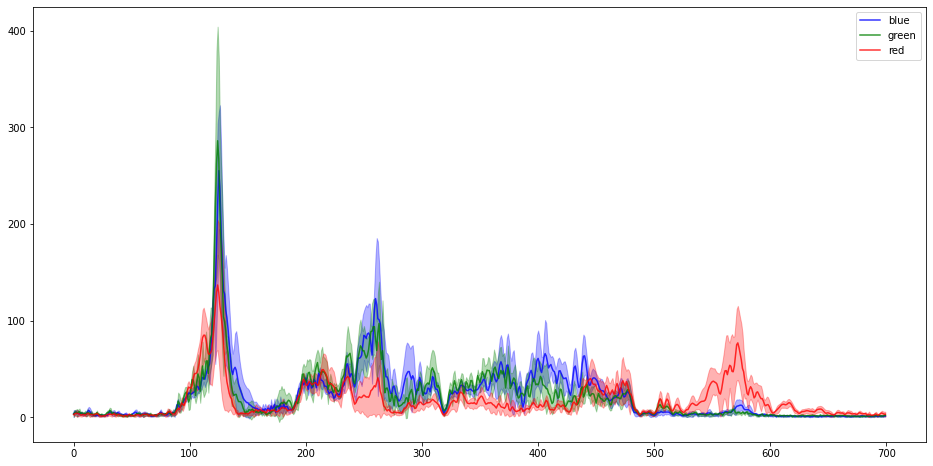

In [108]:
W = 700

plt.figure(figsize=(16, 8))
for category, cat_data in data_processed.items():
    if category not in ('red', 'green', 'blue'):
        continue
    assert len(set(rate for rate, _ in cat_data)) == 1
    ys = []
    for rate, wav in cat_data:
        y = np.abs(scipy.fft.fft(wav))
        x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
        ys.append(y)

    X = x[:x.shape[0] // 2][:W]
    Ym = np.mean(ys, 0)[:x.shape[0] // 2][:W] / x.shape[0]
    Ys = np.std(ys, 0)[:x.shape[0] // 2][:W] / x.shape[0]
    plt.plot(X, Ym, label=category, alpha=0.8, c=category)
    plt.fill_between(X, Ym+Ys, Ym-Ys, alpha=0.3, color=category)
plt.legend()
plt.show()